https://github.com/randerson112358/Python/blob/master/simple_returns.py

https://www.youtube.com/watch?v=O-O1WclwXck



In [0]:

from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
stockSymbols = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
stockStartDate = '2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-03-14'

In [0]:
def getMyPortfolio(stocks= stockSymbols, start = stockStartDate, end = today, col='Adj Close'):
    #data = web.get_data_yahoo(stocks, start = start, end = end)[col]
    data =  web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [5]:
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.687538,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.820526,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.931404,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.543602,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.719994,13.880000,365.280823
...,...,...,...,...,...
2020-03-09,169.500000,1800.609985,266.170013,346.489990,1215.560059
2020-03-10,178.190002,1891.819946,285.339996,364.130005,1280.390015
2020-03-11,170.240005,1820.859985,275.429993,349.920013,1215.410034


In [0]:
def showGraph(stocks= stockSymbols,start=stockStartDate, end=today, col='Adj Close'):
  
  # Create the title 'Portfolio (High,	Low,	Open,	Close,	Volume,	Adj Close) Price History
  title = 'Portfolio ' + col + ' Price History'
  #Get the stocks
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col = col)
  
  # Visualize the price history
  plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
  # Loop through each stock and plot the Adj Close for each day
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
  plt.title(title)
  plt.xlabel('Date',fontsize=18)
  plt.ylabel(col +' Price USD ($)',fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


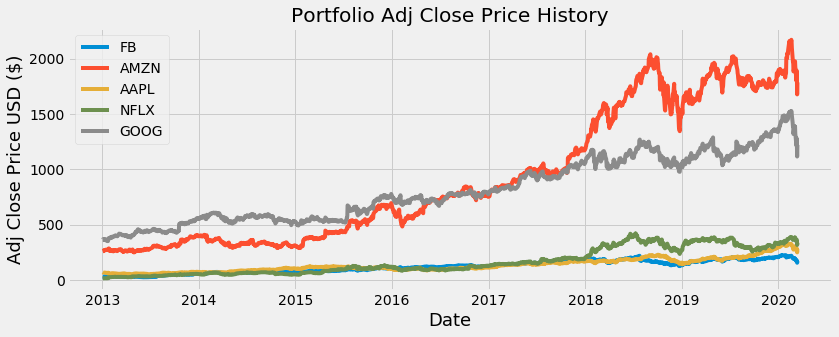

In [7]:
showGraph(stockSymbols)

In [8]:
daily_simple_returns = my_stocks.pct_change(1)
# monthly_simple_returns = my_stocks.pct_change(21) # 21 for ONE MONTH lookback for each individual return
# annual_simple_returns = my_stocks.pct_change(253) # 253 for ONE YEAR lookback for each individual return
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-03-09,-0.064001,-0.052854,-0.079092,-0.060926,-0.063809
2020-03-10,0.051268,0.050655,0.072022,0.050911,0.053333
2020-03-11,-0.044615,-0.037509,-0.034731,-0.039025,-0.050750


In [9]:
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.492851,0.387020,0.334639,0.522392
AMZN,0.492851,1.000000,0.405518,0.420602,0.600443
AAPL,0.387020,0.405518,1.000000,0.231926,0.479957
NFLX,0.334639,0.420602,0.231926,1.000000,0.410018
GOOG,0.522392,0.600443,0.479957,0.410018,1.000000


In [10]:
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000435,0.000193,0.000134,0.000202,0.000167
AMZN,0.000193,0.000353,0.000127,0.000229,0.000173
AAPL,0.000134,0.000127,0.000278,0.000112,0.000122
NFLX,0.000202,0.000229,0.000112,0.000838,0.000182
GOOG,0.000167,0.000173,0.000122,0.000182,0.000234


In [11]:
daily_simple_returns.var()

Symbols
FB      0.000435
AMZN    0.000353
AAPL    0.000278
NFLX    0.000838
GOOG    0.000234
dtype: float64

In [12]:
daily_simple_returns.std()


Symbols
FB      0.020856
AMZN    0.018797
AAPL    0.016659
NFLX    0.028956
GOOG    0.015297
dtype: float64

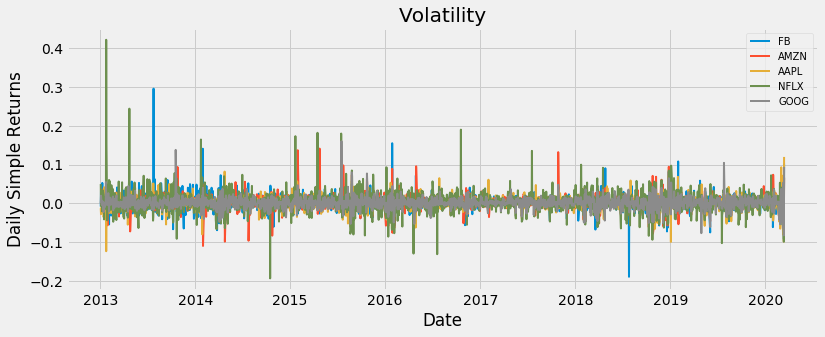

In [14]:
plt.figure(figsize=(12,4.5))
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.legend(loc='upper right', fontsize=10) 

plt.title('Volatility')
plt.ylabel('Daily Simple Returns') #Label the Y-axis simple returns 
plt.xlabel('Date')
plt.show()

In [15]:
dailyMeanSimpleReturns = daily_simple_returns.mean() 

# Print the daily mean simple return
print("The daily mean simple return: ")
print(dailyMeanSimpleReturns)

The daily mean simple return: 
Symbols
FB      0.001211
AMZN    0.001246
AAPL    0.000911
NFLX    0.002195
GOOG    0.000789
dtype: float64


In [0]:
# Calculate the expected portfolio daily performance with random weights 
# [0.4, 0.1, 0.3,0.1,0.1] => 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
randomWeights = np.array([0.4, 0.1, 0.3,0.1,0.1])
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns*randomWeights) #NOTE: Be sure to account for rounding of decimal


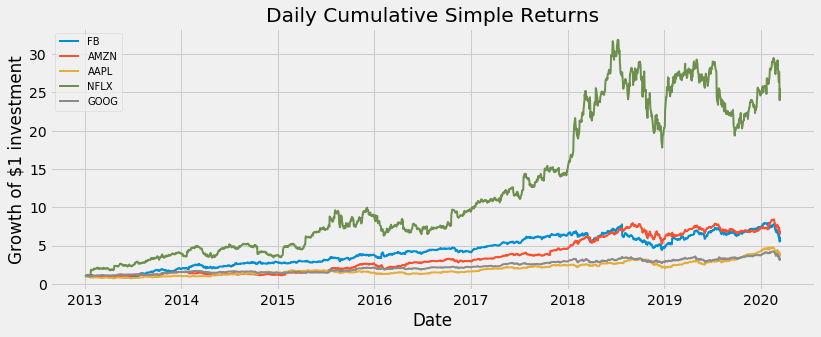

In [17]:
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
# Show the cumulative simple return
dailyCumulSimplReturn

# Visualize the daily cumulative simple returns
fig = plt.figure(figsize=(12.2,4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)

# Place the legend in the upper left corner with font size of 10
plt.legend(loc='upper left', fontsize=10) 
plt.xlabel("Date")
plt.ylabel("Growth of $1 investment")
plt.title("Daily Cumulative Simple Returns")
plt.show()